In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [24]:
train_data_dir = '/content/drive/MyDrive/Anime_dataset/train/'
test_data_dir = '/content/drive/MyDrive/Anime_dataset/test/'

In [6]:
train_data_dir

'/content/drive/MyDrive/Anime_dataset/train/'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set target size for resizing
target_size = (150, 150)

# Set batch size
batch_size = 250

# Load and preprocess training images and labels
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess testing images and labels
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)
train_images, train_labels = train_generator.next()
test_images, test_labels = test_generator.next()


Found 52586 images belonging to 229 classes.
Found 16501 images belonging to 229 classes.


In [8]:
import zipfile
zip_file_path = '/content/drive/MyDrive/Anime_dataset.zip'
extracted_dir_path = '/content/drive/MyDrive/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Zip file extracted successfully.")


KeyboardInterrupt: 

In [9]:
import os
directory = train_data_dir
folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
folders.sort()
class_names = folders
print(class_names)


['A Lull in the Sea', 'A Place Further Than The Universe', 'A Silent Voice', 'AKIRA', 'Ace of Diamond', 'Akatsuki no Yona', 'Angel Beats!', 'Aria The Natural', 'Assassination Classroom', 'Attack on Titan', 'Baccano!', 'Bakemonogatari', 'Bakuman', 'Barakamon', 'Beck Mongolian Chop Squad', 'Berserk', 'Big Windup!', 'Black Butler', 'Black Lagoon', 'Bunny Drop', 'Cardcaptor Sakura', 'Carpcaptor Sakura', 'Castle in the Sky', 'Chihayafuru', 'Clannad', 'Code Geass', 'Cross Game', 'D.Gray-man', 'DARLING in the FRANXX', 'Daily Lives of High School Boys', 'Darker than Black', 'Death Note', 'Death Parade', 'Den-noh Coil', 'Descending Stories Showa Genroku Rakugo Shinju', 'Detective Conan', 'Detroit Metal City The Animated Series', 'Dragon Ball', 'Dragon Ball Z', 'Durarara', 'Durarara!!', 'ERASED', 'Erin', 'Eureka Seven', 'FateZero', 'Fatestay night', 'Fighting Spirit Special', 'From the New World', 'Full Metal Panic', 'Fullmetal Alchemist Brotherhood', 'Gankutsuou The Count of Monte Cristo', 'Gho

In [10]:
len(class_names)

229

In [ ]:
train_images.shape

In [ ]:
train_labels

In [12]:
import matplotlib.pyplot as plt

In [13]:
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)

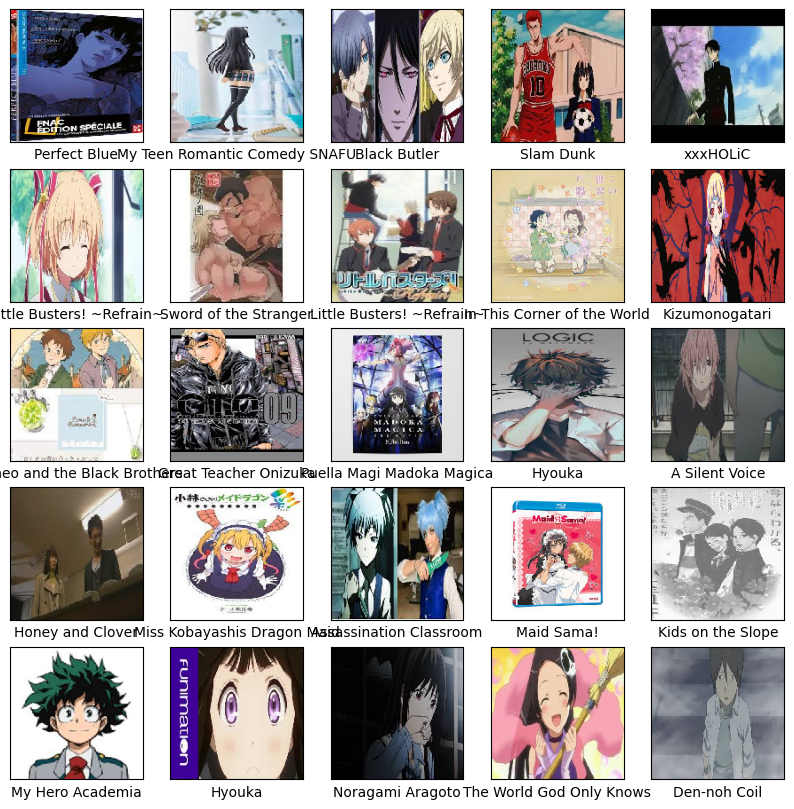

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers,models
import cv2

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(4, 4),activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(230, activation='softmax')
])


In [18]:
cnn.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Print model summary
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 64)      3136      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 64)        65600     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        32800     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0

In [19]:

test_loss, test_accuracy = cnn.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 230) are incompatible


In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers

cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(4, 4), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(229, activation='softmax')  # Output layer with 10 units for 10 classes
])


In [32]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [34]:
cnn.fit(train_images,train_labels, epochs=20)


Epoch 1/20
8/8 [==============================] - 25s 3s/step - loss: 5.3069 - accuracy: 0.0080
Epoch 2/20
8/8 [==============================] - 25s 3s/step - loss: 5.2240 - accuracy: 0.0080
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 5.1158 - accuracy: 0.0080
Epoch 4/20
8/8 [==============================] - 26s 3s/step - loss: 5.0003 - accuracy: 0.0240
Epoch 5/20
8/8 [==============================] - 25s 3s/step - loss: 4.8021 - accuracy: 0.0360
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 4.4692 - accuracy: 0.0760
Epoch 7/20
8/8 [==============================] - 26s 3s/step - loss: 4.0079 - accuracy: 0.1720
Epoch 8/20
8/8 [==============================] - 26s 3s/step - loss: 3.3463 - accuracy: 0.2520
Epoch 9/20
8/8 [==============================] - 26s 3s/step - loss: 2.6370 - accuracy: 0.4160
Epoch 10/20
8/8 [==============================] - 24s 3s/step - loss: 1.7811 - accuracy: 0.5800
Epoch 11/20
8/8 [======================

In [35]:
test_predictions = cnn.predict(test_images)
for i in range(len(test_predictions)):
    print("Predicted label:", test_predictions[i].argmax())


8/8 [==============================] - 6s 733ms/step
Predicted label: 174
Predicted label: 184
Predicted label: 45
Predicted label: 169
Predicted label: 94
Predicted label: 97
Predicted label: 218
Predicted label: 176
Predicted label: 68
Predicted label: 29
Predicted label: 184
Predicted label: 87
Predicted label: 17
Predicted label: 176
Predicted label: 132
Predicted label: 1
Predicted label: 184
Predicted label: 41
Predicted label: 88
Predicted label: 17
Predicted label: 91
Predicted label: 52
Predicted label: 199
Predicted label: 71
Predicted label: 227
Predicted label: 19
Predicted label: 113
Predicted label: 30
Predicted label: 48
Predicted label: 33
Predicted label: 94
Predicted label: 29
Predicted label: 160
Predicted label: 77
Predicted label: 31
Predicted label: 154
Predicted label: 30
Predicted label: 129
Predicted label: 184
Predicted label: 129
Predicted label: 54
Predicted label: 176
Predicted label: 29
Predicted label: 160
Predicted label: 189
Predicted label: 189
Predict

In [45]:
print(test_labels)

[ 80  85 149  16 206  22 101 163  53 168 124  32  64  77  40 149 105 159
 159 186   9 211  33  73 172 190 181 212   9 163  30 216 149  62  79   8
  38 127  23  90 221 120  62 219 104  26 222 175 124  46 162 210 202  40
  53 225 152 166 228  15 182 113  15 139 143 122 195 110  19 124 107  65
  15 124  23  82  76 225 163 119 191  25  44  72 197 112  87 139  29  91
 175 120  43 141 216 204  99 120  98 116 112 227  37 150 101 159 101  57
  38  46 164 186 205 206  15  34  72 130 104 176 186  82 128  71  42  69
 215 168  97  81 168 167 183 215 213 143 101  21 117 194 181 127 206 170
  90 101  70  74  64 169 216  65  90  79 162 211  50 165  71  13  48  30
  41 196 159  68 184 174  87 214  16  46 101 161  95 166 116 166  92  32
   9  68 143  55 156 185  57   6 179  63 143 171  84 137  18 182  15  53
  16  88 218  53  26  75   2  81  24   4 113 215 186 200  34 211  85 159
 102 190  96 228 155  14   1  39   1 186 205  54 204  23  14 134  28  97
  20 126   3 182  26   5  78   3 136  68 181  51  7

In [44]:
from sklearn.metrics import accuracy_score, f1_score

# Convert test_predictions to class labels
predicted_classes = np.argmax(test_predictions, axis=1)

# Assuming test_labels is in one-hot encoded format, convert it back to class indices
test_labels_indices = np.argmax(test_labels)

# Calculate accuracy
accuracy = accuracy_score(test_labels_indices, predicted_classes)

# Calculate F1-score
f1score = f1_score(test_labels_indices, predicted_classes, average='macro')

print("Accuracy:", accuracy)
print("F1-score:", f1score)


InvalidParameterError: The 'y_true' parameter of accuracy_score must be an array-like or a sparse matrix. Got 58 instead.